To visualize the relation between each subcategory of features with the target feature `Diagnosis`, we performed a simple 2-dimensional PCA regression for each subcategory and plotted the results with color coding based on `Diagnosis`. The data is processed through two pipelines: one with a scaling preprocessing and one without it. Since the scales of features are not the same and PCA is sensitive to scaling, the results are different; we have plotted the outcomes of both.  

In [1]:
##Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
##Loading the dataset
df_train = pd.read_csv("../../data/train_set.csv")

#Pre-processing
df_train = df_train.drop(columns=['DoctorInCharge'])


In [3]:
# Seperating features into subcategories

all_features = [   'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
               'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
               'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
               'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
               'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
               'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
               'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
               'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
               'Forgetfulness' , 'Diagnosis']
demo_features = ['Age', 'Gender', 'Ethnicity','EducationLevel','Diagnosis']
life_style_features = ['BMI','Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality','Diagnosis']
medic_hist_features = ['FamilyHistoryAlzheimers', 'CardiovascularDisease','Diabetes', 'Depression', 'HeadInjury', 'Hypertension','Diagnosis']
clinical_features = ['SystolicBP','DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL','CholesterolTriglycerides','Diagnosis']
cognitive_features = ['MMSE', 'FunctionalAssessment','MemoryComplaints', 'BehavioralProblems', 'ADL','Diagnosis']
symptoms_features = ['Confusion','Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks','Forgetfulness','Diagnosis']

no_cognitive = [item for item in all_features if item not in cognitive_features]
no_cognitive.append('Diagnosis')

subcategory_dict = {'all_features' : all_features,'demo':demo_features ,'lifestyle': life_style_features , 'medic' : medic_hist_features , 
                    'clinical':clinical_features , 'cognitive': cognitive_features , 'symptoms': symptoms_features , 'no_cognitive': no_cognitive}


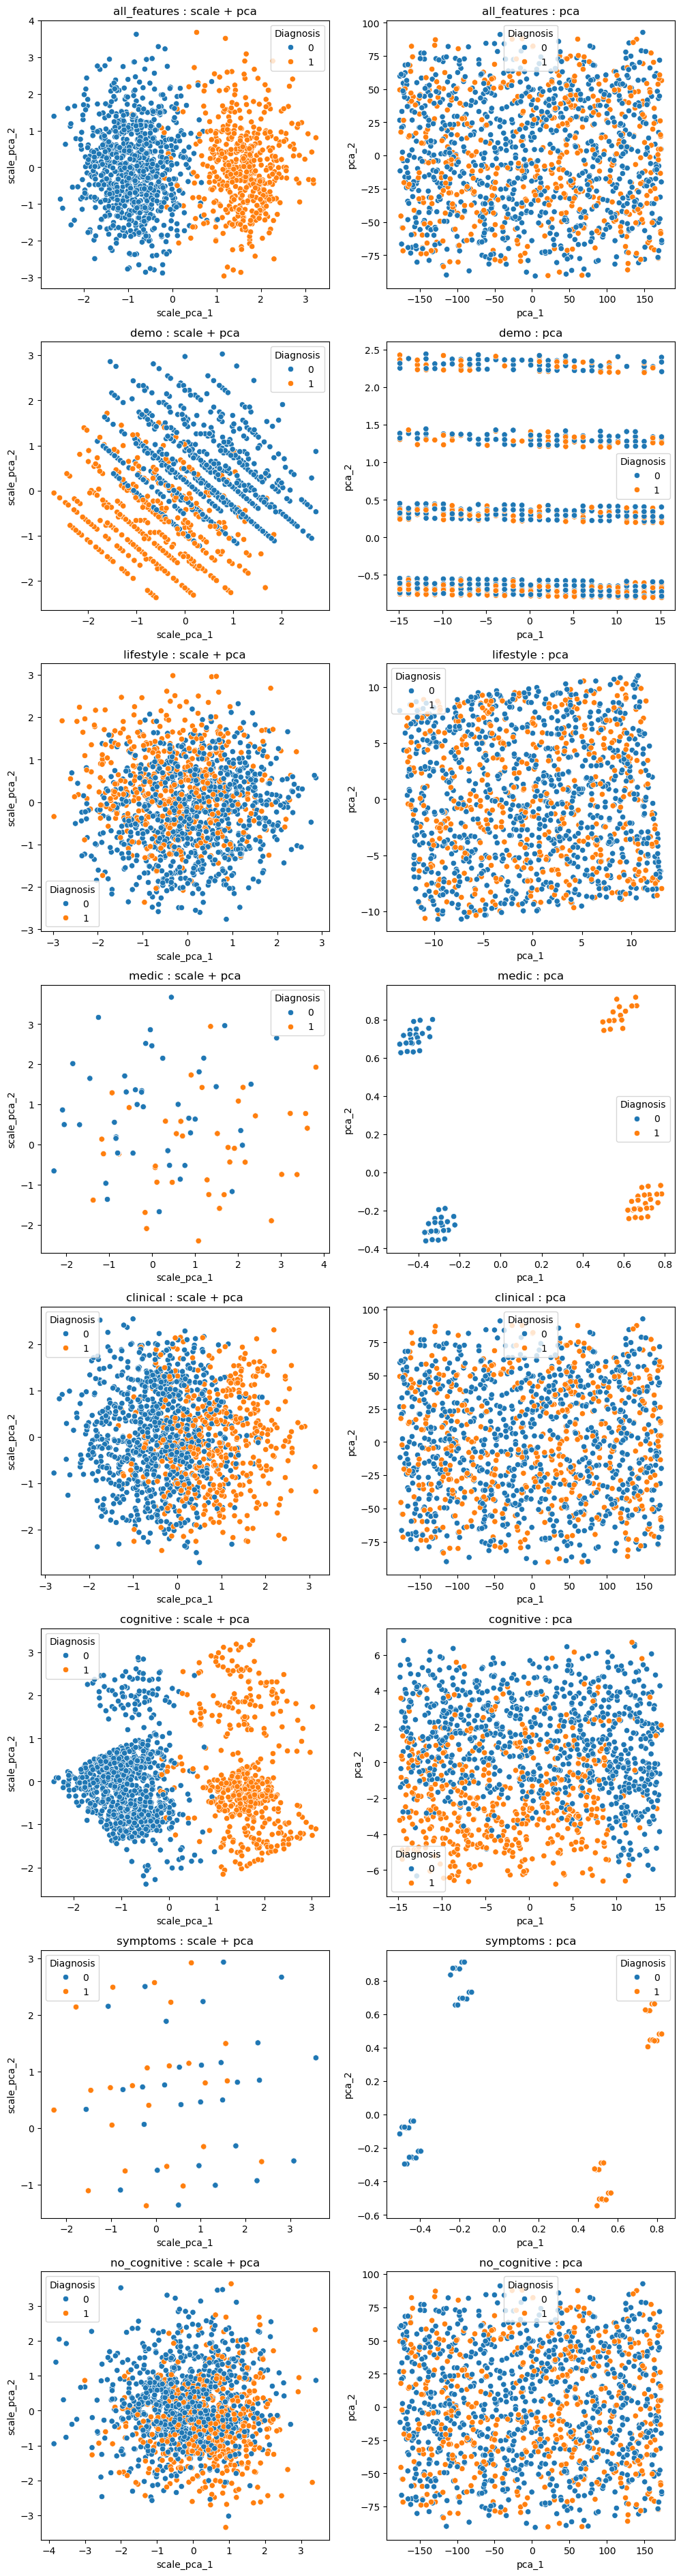

In [4]:
pipe_scale_pca = Pipeline([('scale', StandardScaler())
                 ,('pca', PCA(2))])
pipe_pca = Pipeline([('pca', PCA(2))])

fig,axes = plt.subplots(8,2 , figsize=(12,48))

i=0

for key in subcategory_dict:
    value = subcategory_dict[key]

    pipe_scale_pca.fit(df_train[value])
    fit_scale_pca = pipe_scale_pca.transform(df_train[value])

    pipe_pca.fit(df_train[value])
    fit_pca = pipe_pca.transform(df_train[value])
    
    df_value = pd.DataFrame({'Diagnosis':df_train.Diagnosis , 'scale_pca_1' : fit_scale_pca[:,0]  , 'scale_pca_2' : fit_scale_pca[:,1],
                             'pca_1' : fit_pca[:,0] , 'pca_2' : fit_pca[:,1]})

    sns.scatterplot(data=df_value , x='scale_pca_1' , y='scale_pca_2' , hue= 'Diagnosis' , ax=axes[i,0])
    axes[i,0].set_title(key + ' : scale + pca')

    sns.scatterplot(data=df_value , x='pca_1' , y='pca_2' , hue= 'Diagnosis' , ax=axes[i,1])
    axes[i,1].set_title(key + ' : pca')

    i=i+1

plt.show()